Jeremy Beard - MSDS 610 - Week 4 Assignment

The following jupyter notebook answers the questions asked in MSDS 610 Week 4's assignment. It covers using PyMongo to connect to a MongoDB database, query a few aspects about the data, create a couple charts, and close the database.

First we will import the MongoClient and connect to the 'parking' database, and find the 'tickets' collection.

In [1]:
from pymongo import MongoClient

In [2]:
client = MongoClient()

In [3]:
db = client['parking']

In [4]:
tickets = db['tickets']

In [5]:
tickets.find_one()

{'_id': ObjectId('6295280acd410252a440a5ea'),
 'Ticket number': 1103341116,
 'Issue Date': '2015-12-21T00:00:00',
 'Issue time': 1251,
 'Meter Id': '',
 'Marked Time': '',
 'RP State Plate': 'CA',
 'Plate Expiry Date': 200304,
 'VIN': '',
 'Make': 'HOND',
 'Body Style': 'PA',
 'Color': 'GY',
 'Location': '13147 WELBY WAY',
 'Route': 1521,
 'Agency': 1,
 'Violation code': '4000A1',
 'Violation Description': 'NO EVIDENCE OF REG',
 'Fine amount': 50,
 'Latitude': 99999,
 'Longitude': 99999}

In [6]:
type(tickets)

pymongo.collection.Collection

In [7]:
tickets.count_documents({})

9439998

The cells below answer the prompt which asks for the entries where the license plate is not CA. This field is the 'RP State Plate' field and I used the '$ne' parameter to specify that the plate should be not equal to California.

In [8]:
tickets_not_CA = tickets.find({'RP State Plate': {'$ne': 'CA'}})

I then verified my usage was correct by adding up the plates that were from CA, and the plates that were not from CA, and ensuring that they summed up to the correct number.

In [9]:
type(tickets_not_CA)

pymongo.cursor.Cursor

In [10]:
tickets_not_CA_counts = tickets.count_documents({'RP State Plate': {'$ne': 'CA'}})
tickets_not_CA_counts

646975

In [11]:
tickets_CA = tickets.find({'RP State Plate': {'$eq': 'CA'}})

In [12]:
tickets_CA_counts = tickets.count_documents({'RP State Plate': {'$eq': 'CA'}})
tickets_CA_counts

8793023

In [13]:
(tickets_CA_counts + tickets_not_CA_counts)

9439998

I then answered the final prompt which asks for a bar plot of the license plates not from CA. This was quite simple to do using pandas and matplotlib.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [15]:
df = pd.io.json.json_normalize(tickets_not_CA)

/home/jeremy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


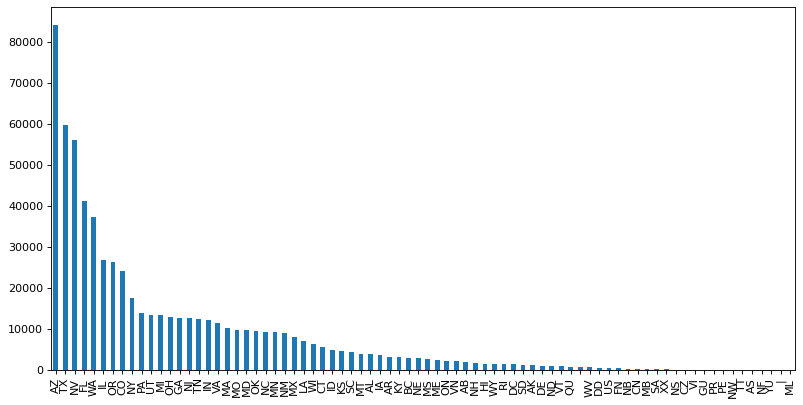

In [16]:
figure(figsize=(12, 6), dpi=80)
ax = df['RP State Plate'].value_counts().plot.bar()

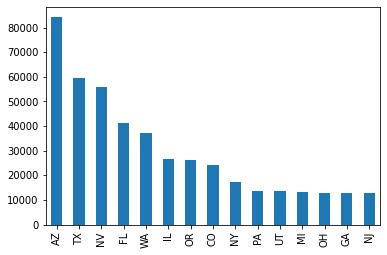

In [17]:
ax = df['RP State Plate'].value_counts()[:15].plot.bar()

In [18]:
fig = ax.get_figure()
fig.savefig('Week4_Assignment_barplot.jpg')

In [19]:
client.close()